In [1]:
%pip install opencv-python numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt

Note: using dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

In [3]:
def get_dataset():
    path_normal = "TB_Chest_Radiography_Database/Normal"
    path_tb = "TB_Chest_Radiography_Database/Tuberculosis"
    x_normal=[]
    x_tb=[]
    LIMIT = 2000
    for i, img in enumerate(os.listdir(path_normal)):        
        # Handle cropping
        image = cv2.imread(os.path.join(path_normal, img))
        gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gs,100,200)
        x, y, w, h = cv2.boundingRect(edges)
        temp = None
        try:
            temp = image[y:y+h, x:x+w, :].copy()
        except:
            pass

        if len(temp)>0:
            image = temp

        # Handle cropping to even smaller
        L2_image = cv2.imread(os.path.join(path_normal, img))
        gs = cv2.cvtColor(L2_image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gs,100,200,L2gradient=True)
        x, y, w, h = cv2.boundingRect(edges)
        temp = None
        try:
            temp = L2_image[y:y+h, x:x+w, :].copy()
        except:
            pass
        
        if len(temp)>0:
            image = temp

        image = (image)/255
        c = 255 / (1+np.max(image))
        image = c*np.log(1+image)
        image = np.array(image, dtype=np.uint8)

        ycrcb_img = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
        image = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

        # image = cv2.equalizeHist(image)
        image = cv2.resize(image, (512, 512))

        if(i==LIMIT): 
            break
        x_normal.append(image)
    
    for i, img in enumerate(os.listdir(path_tb)):

        # Handle cropping
        image = cv2.imread(os.path.join(path_tb, img))
        gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gs,100,200)
        x, y, w, h = cv2.boundingRect(edges)
        temp = None
        try:
            temp = image[y:y+h, x:x+w, :].copy()
        except:
            pass

        if len(temp)>0:
            image = temp

        # Handle cropping to even smaller
        L2_image = cv2.imread(os.path.join(path_tb, img))
        gs = cv2.cvtColor(L2_image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gs,100,200,L2gradient=True)
        x, y, w, h = cv2.boundingRect(edges)
        temp = None
        try:
            temp = L2_image[y:y+h, x:x+w, :].copy()
        except:
            pass
        
        if len(temp)>0:
            image = temp

        # Log transform
        image = (image)/255
        c = 255 / (1+np.max(image))
        image = c*np.log(1+image)
        image = np.array(image, dtype=np.uint8)

        ycrcb_img = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
        image = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)


        # image = cv2.equalizeHist(image)
        image = cv2.resize(image, (512, 512))
        if(i==LIMIT): 
            break
        if image.shape != (512, 512, 3):
            continue
        x_tb.append(image)

    return x_normal, x_tb
    

In [4]:
x_normal, x_tb = get_dataset()
# x_tb=x_tb[x_tb != None]

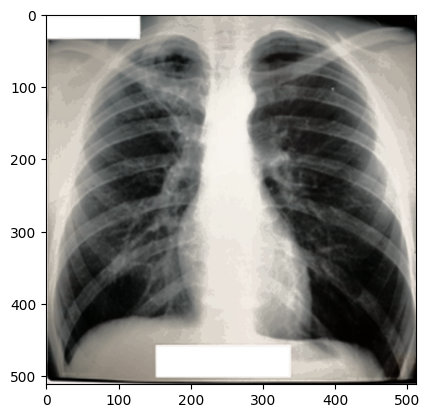

In [5]:
plt.imshow(x_tb[0])

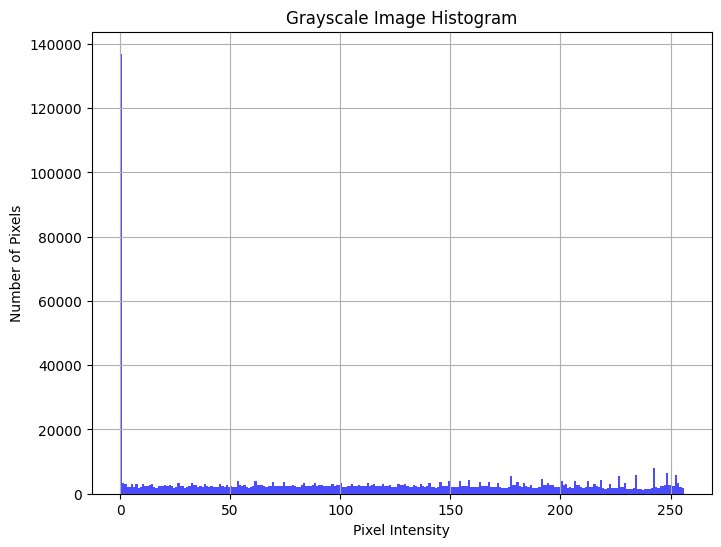

In [6]:
im = x_normal[0]
plt.figure(figsize=(8, 6))
plt.hist(im.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.grid(True)
plt.show()

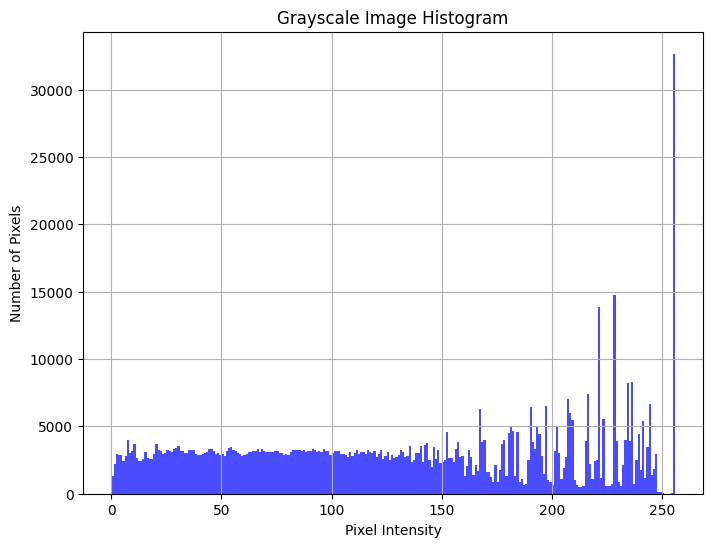

In [7]:
im = x_tb[0]
plt.figure(figsize=(8, 6))
plt.hist(im.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.grid(True)
plt.show()

In [8]:
x_normal[0].shape

(512, 512, 3)

In [9]:
np.min(x_tb[0])

np.uint8(0)

In [10]:
x_normal

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], shape=(512, 512, 3), dtype=uint8),
 array([[[131, 131, 131],
         [ 94,  94,  94],
         [ 55,  55,  55],
         ...,
         [ 70,  70,  70],
         [ 

In [11]:
x_tb

[array([[[239, 239, 239],
         [160, 160, 160],
         [114, 112, 112],
         ...,
         [  3,   3,   3],
         [ 68,  67,  69],
         [102, 104, 104]],
 
        [[243, 243, 243],
         [200, 200, 200],
         [141, 141, 141],
         ...,
         [  4,   2,   2],
         [ 65,  65,  65],
         [ 98, 100, 100]],
 
        [[244, 244, 244],
         [244, 244, 244],
         [242, 242, 242],
         ...,
         [  3,   2,   2],
         [ 55,  55,  55],
         [ 90,  92,  92]],
 
        ...,
 
        [[246, 244, 244],
         [245, 243, 242],
         [238, 234, 233],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[246, 244, 244],
         [245, 243, 242],
         [238, 234, 233],
         ...,
         [  5,   3,   3],
         [  5,   3,   3],
         [  5,   3,   3]],
 
        [[246, 244, 244],
         [245, 243, 242],
         [238, 234, 233],
         ...,
         [ 79,  76,  78],
  

In [12]:
x_tb[0].shape

(512, 512, 3)

In [13]:
from matplotlib import pyplot

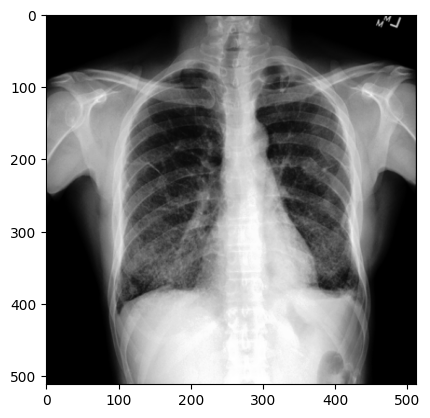

In [14]:
pyplot.imshow(x_normal[0])

In [15]:
np.array(x_normal,dtype=np.float32)

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [16]:
def segment(source):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    k = 4

    image = np.array(source,dtype=np.float32)
    pixel_values = np.array(image.reshape((-1, 3)) if len(image.shape) == 3 else image.reshape((-1, 1)))
    pixel_values = np.float32(pixel_values)

    retval, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS) 


    centers = np.uint8(centers) 

    segmented_data = centers[labels.flatten()] 

    segmented_image = segmented_data.reshape((image.shape)) 
    return segmented_image


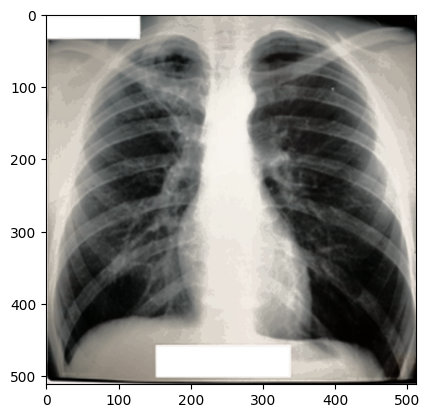

In [17]:
pyplot.imshow(x_tb[0])

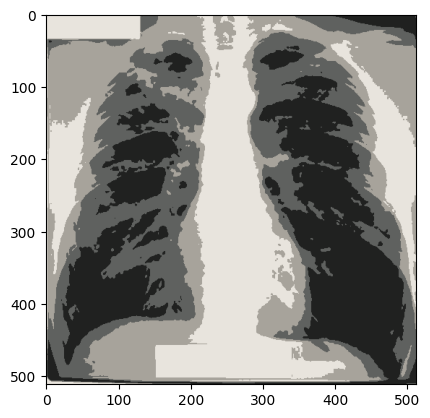

In [18]:
pyplot.imshow(segment(x_tb[0]))

In [19]:
np.array(x_tb).shape

(700, 512, 512, 3)

In [20]:
x=[segment(x) for x in x_normal[:700]]
y=["normal"]*len(x_normal[:700])
x=x+[segment(x) for x in x_tb]
y=y+["tb"]*len(x_tb)
dict = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

In [21]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.ensemble import RandomForestClassifier 

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en

In [23]:
dict["x"].shape

(1400, 512, 512, 3)

In [24]:
X_reshaped = dict["x"].reshape(dict["x"].shape[0], dict["x"].shape[1]*dict["x"].shape[2]*dict["x"].shape[3])


In [25]:
X_reshaped

array([[ 10,  10,  10, ...,  10,  10,  10],
       [156, 156, 156, ...,  19,  19,  19],
       [ 90,  90,  90, ...,  29,  29,  29],
       ...,
       [102,  98,  84, ..., 233, 230, 208],
       [228, 224, 217, ...,  24,  23,  21],
       [ 18,  18,  18, ..., 159, 159, 159]],
      shape=(1400, 786432), dtype=uint8)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, dict["y"] ,
                                   random_state=42, 
                                   test_size=0.2, 
                                   shuffle=True)

In [27]:
clf = RandomForestClassifier(max_depth=7, random_state=42, verbose=True)

In [28]:
X_train

array([[ 30,  30,  30, ...,  30,  30,  30],
       [ 35,  35,  35, ...,  35,  35,  35],
       [ 22,  22,  22, ...,  22,  22,  22],
       ...,
       [229, 229, 229, ..., 229, 229, 229],
       [233, 233, 233, ..., 233, 233, 233],
       [ 99,  96,  87, ...,  31,  29,  24]],
      shape=(1120, 786432), dtype=uint8)

In [29]:
X_test

array([[151, 151, 151, ..., 222, 222, 222],
       [ 33,  33,  33, ...,  33,  33,  33],
       [223, 223, 223, ...,  21,  21,  21],
       ...,
       [ 31,  31,  31, ...,  91,  91,  91],
       [ 97,  97,  97, ...,  31,  31,  31],
       [  5,   5,   5, ...,   5,   5,   5]],
      shape=(280, 786432), dtype=uint8)

In [30]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   10.7s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.5s finished


,n_estimators,100
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
result = clf.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
trainres =clf.predict(X_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
accuracy_score(y_train, trainres)

0.9919642857142857

In [35]:
accuracy_score(y_test, result)

0.9178571428571428